In [ ]:
라이브러리 임포트

In [1]:
from PIL import Image
from skimage.io import imread, imshow, show
from skimage.color import rgb2gray
from scipy import ndimage, misc, signal, fftpack

import matplotlib.pylab as pylab
import numpy as np
import timeit # 수행 시간 체크

# scipy 1.1 버전부터 signaltonoise() 함수 제공되지 않음
# 아래 함수 구현으로 사용함
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [ ]:
numpy fft를 사용한 주파수 영역 가우시안 블러 필터

C:\Users\bae22\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\bae22\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\bae22\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: ComplexWarning: Casting complex values to real discards the imaginary part


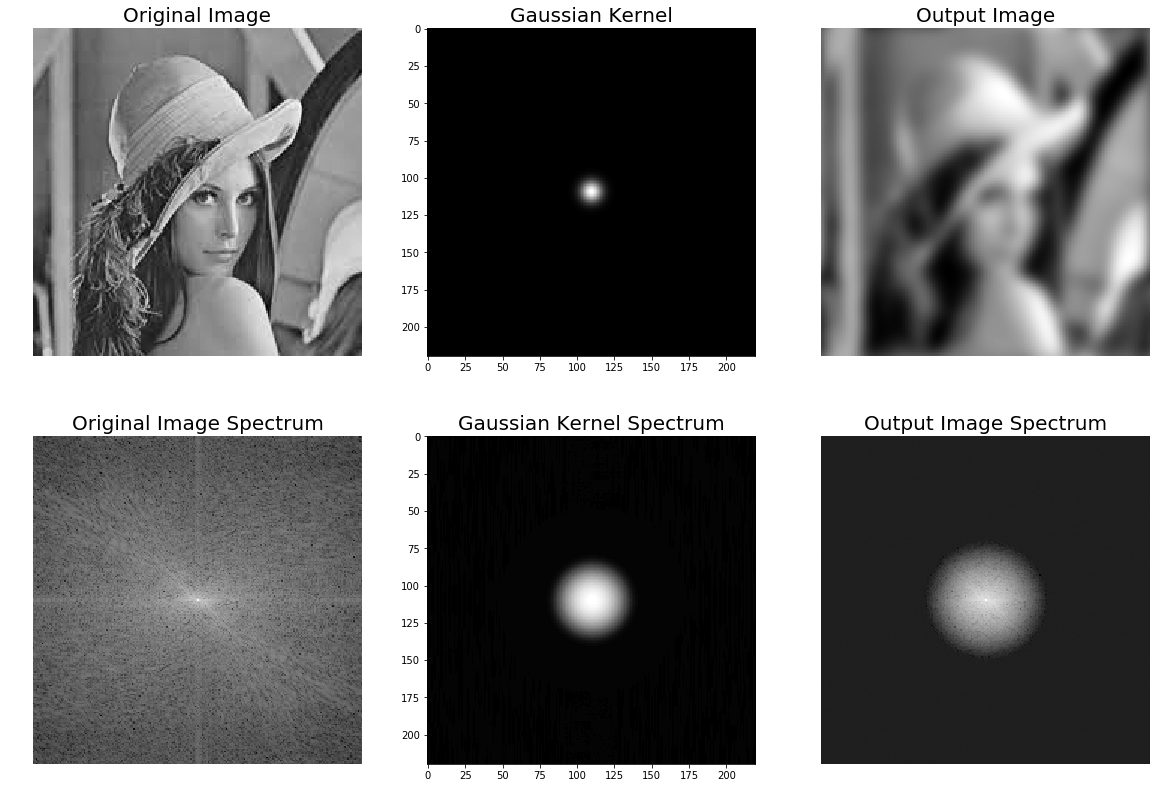

In [2]:
import numpy.fft as fp
# RGB 3개 채널의 각 화소를 평균함 – 명암도 영상 생성
im = np.mean(imread('../images/lena.jpg'), axis=2)
freq = fp.fft2(im)
gauss_kernel = np.outer(signal.gaussian(im.shape[0], 5), \
                        signal.gaussian(im.shape[1], 5))
assert(freq.shape == gauss_kernel.shape)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))
convolved = freq * freq_kernel # 주파수 영역에서 곱
im1 = fp.ifft2(convolved).real # 역FFT, 허수부는 필요없음

# 주파수 스펙트럼 log 및 shift 수행
mag1 = 20*np.log10( 0.1 + fp.fftshift(freq))
mag2 = 20*np.log10( 0.1 + fp.fftshift(freq_kernel))
mag3 = 20*np.log10( 0.1 + fp.fftshift(convolved))

pylab.figure(figsize=(20,15)), pylab.gray() # 명암도 영상으로 표시
pylab.subplot(2,3,1), pylab.imshow(im)
pylab.title('Original Image', size=20), pylab.axis('off')
pylab.subplot(2,3,2), pylab.imshow(gauss_kernel)
pylab.title('Gaussian Kernel', size=20)
pylab.subplot(2,3,3), pylab.imshow(im1)
pylab.title('Output Image', size=20), pylab.axis('off')

pylab.subplot(2,3,4), pylab.imshow(mag1.astype(int))
pylab.title('Original Image Spectrum', size=20), pylab.axis('off')
pylab.subplot(2,3,5), pylab.imshow(mag2.astype(int))
pylab.title('Gaussian Kernel Spectrum', size=20)
pylab.subplot(2,3,6), pylab.imshow(mag3.astype(int))
pylab.title('Output Image Spectrum', size=20), pylab.axis('off')
pylab.subplots_adjust(wspace=0.2, hspace=0)
pylab.show()

In [ ]:
2D에서 가우시안 LPF 커널 스펙트럼

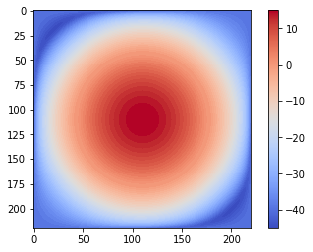

In [4]:
im = rgb2gray(imread('../images/lena.jpg'))
gauss_kernel = np.outer(signal.gaussian(im.shape[0], 1), \
                        signal.gaussian(im.shape[1], 1))
freq = fp.fft2(im)

freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))
mag = 20 * np.log10(0.01 + fp.fftshift(freq_kernel))

pylab.imshow( mag.real.astype(int), cmap='coolwarm')
pylab.colorbar()
pylab.show()

In [ ]:
scipy signal.fftconvolve( )를 사용한 가우시안 블러 필터

(224, 225)


C:\Users\bae22\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


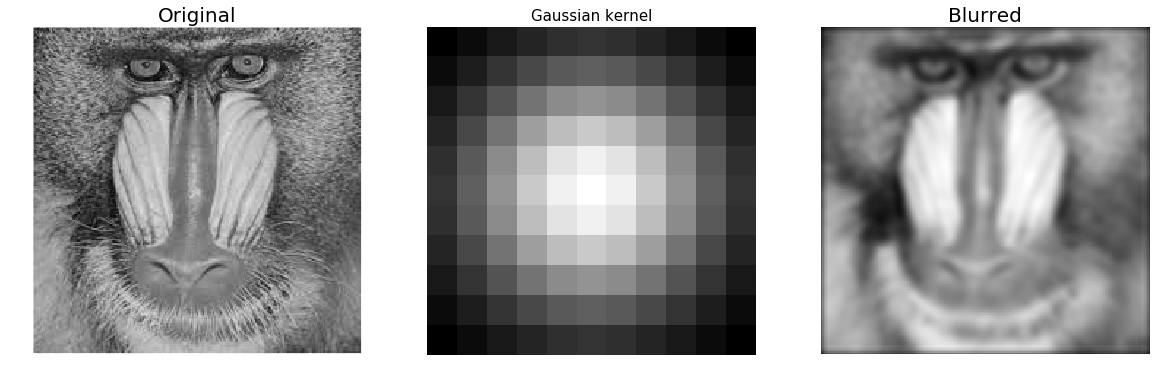

In [5]:
im = np.mean(imread('../images/mandrill.jpg'), axis=2)
print(im.shape) # (224, 225)
# 11 × 11 크기, 표준 편차 3의 2차원 가우시안 필터
gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3))
im_blurred = signal.fftconvolve(im, gauss_kernel, mode='same')

fig, (ax_original, ax_kernel, ax_blurred) = pylab.subplots(1, 3, figsize=(20,8))
ax_original.imshow(im, cmap='gray')
ax_original.set_title('Original', size=20), ax_original.set_axis_off()
ax_kernel.imshow(gauss_kernel)
ax_kernel.set_title('Gaussian kernel', size=15), ax_kernel.set_axis_off()
ax_blurred.imshow(im_blurred, cmap='gray')
ax_blurred.set_title('Blurred', size=20), ax_blurred.set_axis_off()
fig.show()

In [ ]:
컨볼루션 후 원본 영상과 블러 영상 스펙트럼 표시

C:\Users\bae22\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bae22\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


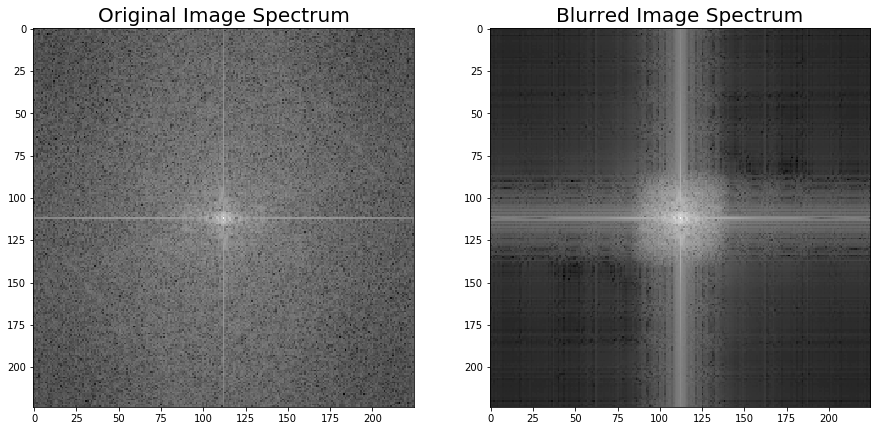

In [6]:
F1 = fftpack.fft2((im).astype(float)) # FFT 수행
F2 = fftpack.fftshift( F1 ) # shift 수행
mag1 = (20*np.log10( 0.1 + F2)).astype(int)
F1 = fftpack.fft2((im_blurred).astype(float))
F2 = fftpack.fftshift( F1 )
mag2 = (20*np.log10( 0.1 + F2)).astype(int)

pylab.figure(figsize=(15,8))
pylab.subplot(1,2,1), pylab.imshow( mag1, cmap='gray')
pylab.title('Original Image Spectrum', size=20)
pylab.subplot(1,2,2), pylab.imshow( mag2, cmap='gray')
pylab.title('Blurred Image Spectrum', size=20)
pylab.show()

In [ ]:
가우시안 블러로 SciPy convolve( )와 fftconvolve( )의 수행시간 비교

(224, 225)


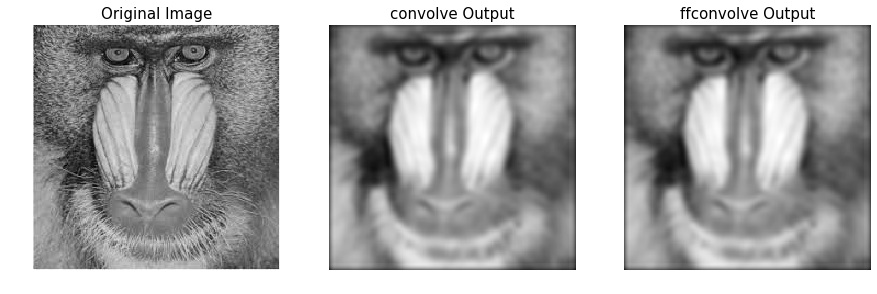

In [8]:
im = np.mean(imread('../images/mandrill.jpg'), axis=2)
print(im.shape) # (224, 225)
gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3))
im_blurred1 = signal.convolve(im, gauss_kernel, mode="same")
im_blurred2 = signal.fftconvolve(im, gauss_kernel, mode='same')

pylab.figure(figsize=(15,5)), pylab.gray()
pylab.subplot(131), pylab.imshow(im),
pylab.title('Original Image', size=15), pylab.axis('off')
pylab.subplot(132), pylab.imshow(im_blurred1)
pylab.title('convolve Output', size=15), pylab.axis('off')
pylab.subplot(133), pylab.imshow(im_blurred2)
pylab.title('ffconvolve Output', size=15),pylab.axis('off')
pylab.show()

(224, 225)


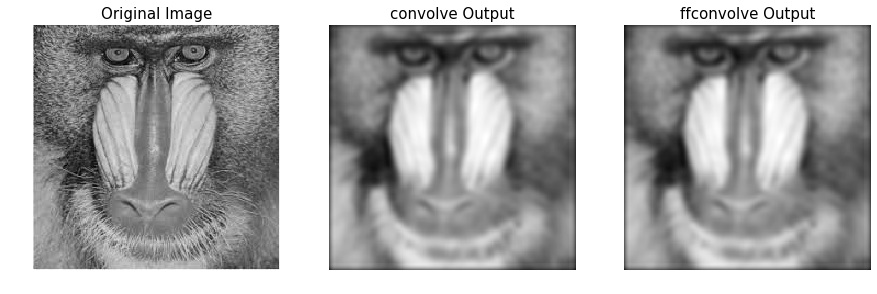

In [10]:
im = np.mean(imread('../images/mandrill.jpg'), axis=2)
print(im.shape) 								# (224, 225)
gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3))
im_blurred1 = signal.convolve(im, gauss_kernel, mode="same")
im_blurred2 = signal.fftconvolve(im, gauss_kernel, mode='same')

pylab.figure(figsize=(15,5)), pylab.gray()
pylab.subplot(131), pylab.imshow(im),
pylab.title('Original Image', size=15), pylab.axis('off')
pylab.subplot(132), pylab.imshow(im_blurred1)
pylab.title('convolve Output', size=15), pylab.axis('off')
pylab.subplot(133), pylab.imshow(im_blurred2)
pylab.title('ffconvolve Output', size=15),pylab.axis('off')
pylab.show()

In [ ]:
수행시간 비교

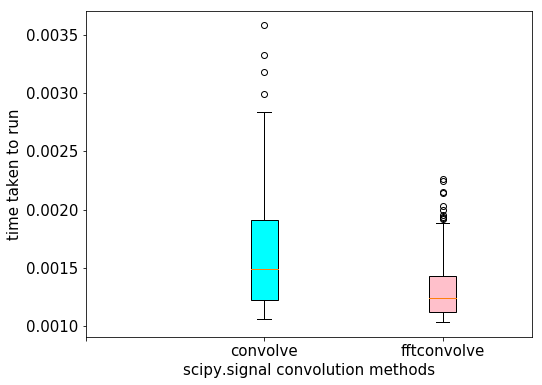

In [15]:
def wrapper_convolve(func):
    def wrapped_convolve():
        return func(im, gauss_kernel, mode="same")
    return wrapped_convolve

wrapped_convolve = wrapper_convolve(signal.convolve)
wrapped_fftconvolve = wrapper_convolve(signal.fftconvolve)
times1 = timeit.repeat(wrapped_convolve, number=1, repeat=100)
times2 = timeit.repeat(wrapped_fftconvolve, number=1, repeat=100)

data = [times1, times2]
pylab.figure(figsize=(8,6))
box = pylab.boxplot(data, patch_artist=True) 		# notch=True
colors = ['cyan', 'pink']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

pylab.xticks(np.arange(3), ('', 'convolve', 'fftconvolve'), size=15)
pylab.yticks(fontsize=15)
pylab.xlabel('scipy.signal convolution methods', size=15)
pylab.ylabel('time taken to run', size = 15)
pylab.show()